In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import wordcloud

In [2]:
train1 = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

In [3]:
train = train1.copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [4]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [5]:
train.drop(columns=['ID', 'first_party', 'second_party'], inplace=True)

In [6]:
train.head()

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [7]:
train['first_party_winner'].value_counts()

first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [8]:
train_target = pd.DataFrame(train, columns=['first_party_winner'])
train_target

,first_party_winner
0,1
1,0
2,1
3,0
4,1
...,...
2473,1
2474,1
2475,0
2476,0


In [9]:
# train_target = train['first_party_winner']
train_nlp = train['facts']
train_nlp = pd.DataFrame(train_nlp, columns=['facts'])
train_nlp
#train_nlps['facts'] = train_nlps['facts'].str.replace(r'<[^<>]*>', '', regex=True)
#train_nlps

,facts
0,"On June 27, 1962, Phil St. Amant, a candidate ..."
1,Ramon Nelson was riding his bike when he suffe...
2,An Alabama state court convicted Billy Joe Mag...
3,Victor Linkletter was convicted in state court...
4,"On April 24, 1953 in Selma, Alabama, an intrud..."
...,...
2473,Congress amended the Clean Air Act through the...
2474,"Alliance Bond Fund, Inc., an investment fund, ..."
2475,"In 1992, the District Court sentenced Manuel D..."
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per..."


In [10]:
#!pip install nltk

In [11]:
import nltk
#nltk.download()

In [12]:
# from nltk.tokenize import WhitespaceTokenizer

# corpus = train_nlp['facts']
# Tokenizer=WhitespaceTokenizer()
# lst_tokens = Tokenizer.tokenize(str(corpus))
# lst_tokens
# # 공백 단위로 문자 쪼개기

In [13]:
import nltk

corpus = train_nlp["facts"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
# 어절 별로 키워드 반환

ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

In [14]:
lst_stopwords = nltk.corpus.stopwords.words("english")
# NLTK가 정의한 영어 불용어 리스트를 리턴
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
user_stopwords = ["law", "court", "case", "plaintiff", "defendant", "judge", "trial", "jurisdiction", "evidence", "witness", "proceeding", "litigation", "party", "motion", "appeal", "action", "suit", "claim", "issue", "fact", "hearing", "counsel", "judgment", "order", "allegation", "argument", "brief", "charge", "complaint", "contract", "crime", "decision", "defense", "document", "file", "find", "hold", "injunction", "instruction", "lawyer", "legal", "liability", "matter", "notice", "opinion", "party", "plea", "point", "policy", "practice", "present", "prosecution", "record", "rule", "sentence", "statute", "testimony", "verdict", 'james', 'bike', 'named',"section", "act", "article", "chapter", "provision", "paragraph", "amendment", "code", "regulation", "statutory", "subsection", "constitution", "legislation", "ordinance", "regulatory", "rulemaking", "title", "enactment", "resolution", "treaty", "administrative", "bylaw",  "legislative", "prescription", "ratification", "repeal", "statutorily", "adjudicate", "adjudication", "arbitrate", "arbitration", "conciliation", "decree", "litigate", "mediation", "remand", "tribunal", "appellate", "affirm", "overrule", "reversal", "vacate", "writ", "certiorari", "mandamus", "subpoena", "arraignment", "indictment", "misdemeanor", "probation", "restitution", "summons", "verdict", "acquittal", "bail", "contempt", "conviction", "felony", "parole", "plea", "prosecutor", "sentence", "attorney", "barrister", "counsel", "juror", "litigator", "magistrate", "prosecutor", "solicitor", "stipulation", "testator", "trustee", "executor", "heir", "lease", "lessor", "lessee", "mortgagee", "mortgagor", "assignee", "assignor", "debtor", "creditor", "insurer", "insured", "beneficiary", "fiduciary", "principal", "agent"]
user_stopwords

['law',
 'court',
 'case',
 'plaintiff',
 'defendant',
 'judge',
 'trial',
 'jurisdiction',
 'evidence',
 'witness',
 'proceeding',
 'litigation',
 'party',
 'motion',
 'appeal',
 'action',
 'suit',
 'claim',
 'issue',
 'fact',
 'hearing',
 'counsel',
 'judgment',
 'order',
 'allegation',
 'argument',
 'brief',
 'charge',
 'complaint',
 'contract',
 'crime',
 'decision',
 'defense',
 'document',
 'file',
 'find',
 'hold',
 'injunction',
 'instruction',
 'lawyer',
 'legal',
 'liability',
 'matter',
 'notice',
 'opinion',
 'party',
 'plea',
 'point',
 'policy',
 'practice',
 'present',
 'prosecution',
 'record',
 'rule',
 'sentence',
 'statute',
 'testimony',
 'verdict',
 'james',
 'bike',
 'named',
 'section',
 'act',
 'article',
 'chapter',
 'provision',
 'paragraph',
 'amendment',
 'code',
 'regulation',
 'statutory',
 'subsection',
 'constitution',
 'legislation',
 'ordinance',
 'regulatory',
 'rulemaking',
 'title',
 'enactment',
 'resolution',
 'treaty',
 'administrative',
 'bylaw'

In [16]:
user_stopwords = ["law", "court", "case", "plaintiff", "defendant", "judge", "trial", "jurisdiction", "evidence", "witness", "proceeding", "litigation", "party", "motion", "appeal", "action", "suit", "claim", "issue", "fact", "hearing", "counsel", "judgment", "order", "allegation", "argument", "brief", "charge", "complaint", "contract", "crime", "decision", "defense", "document", "file", "find", "hold", "injunction", "instruction", "lawyer", "legal", "liability", "matter", "notice", "opinion", "party", "plea", "point", "policy", "practice", "present", "prosecution", "record", "rule", "sentence", "statute", "testimony", "verdict", 'james', 'bike', 'named',"section", "act", "article", "chapter", "provision", "paragraph", "amendment", "code", "regulation", "statutory", "subsection", "constitution", "legislation", "ordinance", "regulatory", "rulemaking", "title", "enactment", "resolution", "treaty", "administrative", "bylaw",  "legislative", "prescription", "ratification", "repeal", "statutorily", "adjudicate", "adjudication", "arbitrate", "arbitration", "conciliation", "decree", "litigate", "mediation", "remand", "tribunal", "appellate", "affirm", "overrule", "reversal", "vacate", "writ", "certiorari", "mandamus", "subpoena", "arraignment", "indictment", "misdemeanor", "probation", "restitution", "summons", "verdict", "acquittal", "bail", "contempt", "conviction", "felony", "parole", "plea", "prosecutor", "sentence", "attorney", "barrister", "counsel", "juror", "litigator", "magistrate", "prosecutor", "solicitor", "stipulation", "testator", "trustee", "executor", "heir", "lease", "lessor", "lessee", "mortgagee", "mortgagor", "assignee", "assignor", "debtor", "creditor", "insurer", "insured", "beneficiary", "fiduciary", "principal", "agent"]
# words = [
#     'June', '27', '1962', 'Phil', 'St.', 'Amant', 'Baton', 'Rouge', 'Louisiana', 'During', 'this', 'television',
#     'speech', 'in', 'accused', 'his', 'political', 'opponent', 'being', 'and', 'of', 'involved', 'in', 'criminal',
#     'activities', 'with', 'the', 'head', 'of', 'local', 'Finally', 'implicated', 'Herman', 'Thompson', 'an', 'East',
#     'Baton', 'Rouge', 'deputy', 'sheriff', 'in', 'a', 'scheme', 'to', 'move', 'money', 'between', 'Teamsters', 'Union',
#     's', 'political', 'Thompson', 'successfully', 'sued', 'for', 'defamation', 'First', 'Circuit', 'Court', 'Appeals',
#     'reversed', 'holding', 'did', 'not', 'show', 'acted', 'with', 'malice', 'Thompson', 'then', 'appealed', 'Supreme',
#     'Court', 'Louisiana', 'court', 'that', 'although', 'public', 'figures', 'forfeit', 'some', 'their', 'Amendment',
#     'protection', 'from', 'defamation', 'accused', 'crime', 'utter', 'disregard', 'whether', 'remarks', 'were', 'true',
#     'uninhibited', 'robust', 'debate', 'rather', 'than', 'an', 'open', 'season', 'to', 'shoot', 'down', 'good', 'name',
#     'of', 'anyone', 'who', 'happens', 'be', 'servant', 'Ramon', 'Nelson', 'riding', 'his', 'bike', 'suffered', 'lethal',
#     'blow', 'back', 'with', 'baseball', 'bat', 'After', 'two', 'eyewitnesses', 'identified', 'Lawrence', 'Owens',
#     'array', 'photos', 'lineup', 'tried', 'convicted', 's', 'death', 'Because', 'carrying', 'cocaine', 'crack',
#     'potentially', 'for', 'distribution', 'judge', 'bench', 'trial', 'ruled', 'probably', 'also', 'drug', 'dealer',
#     'trying', 'knock', 'off', 'found', 'guilty', 'first-degree', 'murder', 'sentenced', 'years', 'prison', 'filed',
#     'petition', 'writ', 'habeas', 'corpus', 'grounds', 'constitutional', 'due', 'process', 'violated', 'during',
#     'argued', 'eyewitness', 'identification', 'should', 'have', 'been', 'inadmissible', 'based', 'unreliability',
#     'impermissibly', 'inferred', 'm']

# stopwords=set(user_stopwords+words)
# stopwords

In [17]:
import re

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None, user_stopwords=None): 
## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
        
    if user_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    user_stopwords]
                        
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [18]:
# from collections import Counter

# stop_words = 'court case state action'

# stop_words = set(stop_words.split(' '))
# # 불용어를 제외한 단어만 남기기
# corpus = [word for word in corpus if not word in stop_words]

# counts = Counter(corpus)
# tags = counts.most_common(100)

# tags

In [19]:
train_nlp["facts_clean"] = train_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords, user_stopwords=user_stopwords))

train_nlp

,facts,facts_clean
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding suffered lethal blow back ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state convicted billy joe magwood murd...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state illegally ob...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air energy 2005 effort ...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district sentenced manuel peguero 274 mon...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [20]:
train_nlp2 = pd.concat([train_nlp,train_target['first_party_winner']],axis=1, join='inner')

print(train_nlp2["first_party_winner"].value_counts())
train_nlp2

first_party_winner
1    1649
0     829
Name: count, dtype: int64


,facts,facts_clean,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...,1
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding suffered lethal blow back ...,0
2,An Alabama state court convicted Billy Joe Mag...,alabama state convicted billy joe magwood murd...,1
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state illegally ob...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...,1
...,...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air energy 2005 effort ...,1
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...,1
2475,"In 1992, the District Court sentenced Manuel D...",1992 district sentenced manuel peguero 274 mon...,0
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...,0


In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [22]:
# y = 1
# corpus = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
# lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
# fig, ax = plt.subplots(nrows=2, ncols=1)
# fig.suptitle("Most frequent words", fontsize=15)
# figure(figsize=(30, 24))
# ## unigrams
# dic_words_freq = nltk.FreqDist(lst_tokens)
# dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
#                        columns=["Word","Freq"])
# dtf_uni.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
#                   kind="barh", title="Unigrams", ax=ax[0], 
#                   legend=False).grid(axis='x')
# ax[0].set(ylabel=None)

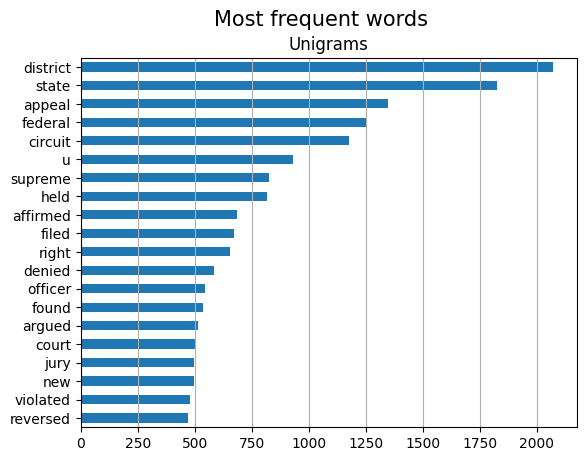

<Figure size 3000x2400 with 0 Axes>

,Word,Freq
0,district,2071
1,state,1827
2,appeal,1348
3,federal,1250
4,circuit,1176
...,...,...
14371,uninterrupted,1
14372,mexicano,1
14373,desarrollo,1
14374,insolvency,1


In [23]:
y=1
corpus1 = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus1.str.cat(sep=" "))

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni1 = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni1.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()    

dtf_uni1

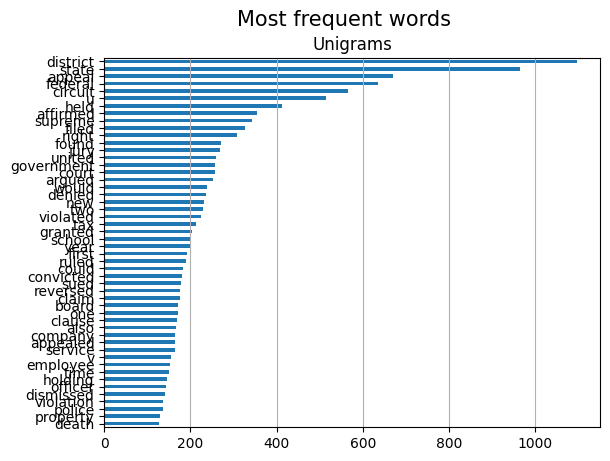

<Figure size 3000x2400 with 0 Axes>

,Word,Freq
0,district,1097
1,state,966
2,appeal,671
3,federal,636
4,circuit,566
...,...,...
10043,localize,1
10044,spurious,1
10045,barcoded,1
10046,westviews,1


In [24]:
y=0
corpus0 = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus0.str.cat(sep=" "))

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni0 = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni0.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()    

dtf_uni0

In [25]:
corpus0

1       ramon nelson riding suffered lethal blow back ...
3       victor linkletter convicted state illegally ob...
14      thole others brought class lawsuit u bank alle...
16      revision texas education law 1975 allowed stat...
21      maher kara joined citigroups healthcare invest...
                              ...                        
2467    thomas heinz worked construction worker 20 yea...
2472    cuauhtemoc gonzalezlopez hired joseph low repr...
2475    1992 district sentenced manuel peguero 274 mon...
2476    march 8 1996 enrico st cyr lawful permanent re...
2477    herbert markman owns patent system track cloth...
Name: facts_clean, Length: 829, dtype: object

In [26]:
# y=0
# corpus = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
# lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

# dic_words_freq = nltk.FreqDist(lst_tokens)
# dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni

In [27]:
# !pip install wordcloud

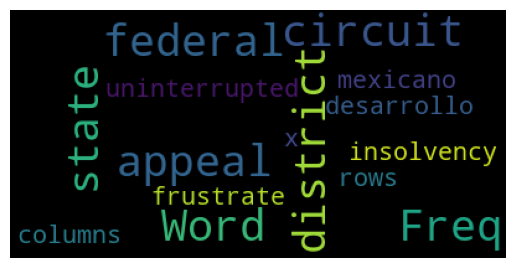

In [28]:
wc1 = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc1 = wc1.generate(str(dtf_uni1))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc1, cmap=None)
plt.show()

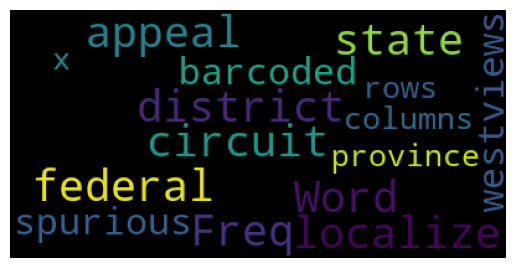

In [29]:
wc0 = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc0 = wc0.generate(str(dtf_uni0))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc0, cmap=None)
plt.show()

## Data Preprocessing

In [30]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()

In [32]:
# vectorizer = TfidfVectorizer()

# def get_vector(vectorizer, df, train_mode):
#     if train_mode:
#         X_facts = vectorizer.fit_transform(df['facts'])
#     else:
#         X_facts = vectorizer.transform(df['facts'])
#     X_party1 = vectorizer.transform(df['first_party'])
#     X_party2 = vectorizer.transform(df['second_party'])
    
#     X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
#     return X

# X_train = get_vector(vectorizer, train_nlp, True)
# Y_train = train_nlp2["first_party_winner"]
# X_test = get_vector(vectorizer, test, False)

In [38]:
train_nlp2

xfeatures = train_nlp2['facts_clean']
ylabel = train_nlp2['first_party_winner']
# xfeatures
# ylabel

In [39]:
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()

X_train, X_test, y_train, y_test = train_test_split(xfeatures,ylabel, test_size=0.25)

In [43]:
X_train.count(), X_test.count(), y_train.count(), y_test.count()

(1858, 620, 1858, 620)

In [48]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Define Model & Train

#### LogisticRegression

In [52]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
# lr.predict(X_train)
# lr.predict(X_test)

In [54]:
lr.score(X_test, y_test)

0.6838709677419355

#### XGBoost

In [57]:
#!pip install xgboost

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
                      booster = 'gbtree',
                      scale_pos_weight=5,
                      learning_rate=0.01,  
                      colsample_bytree = 0.7,
                      subsample = 0.5,
                      max_delta_step = 3,
                      reg_lambda = 2,
                      objective='binary:logistic',
                      n_estimators=818, 
                      max_depth=8,
                     )


xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=8, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=818, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [70]:
y_pred = xgb.predict_proba(X_test)
y_pred

array([[0.27968854, 0.72031146],
       [0.04667443, 0.95332557],
       [0.44971365, 0.55028635],
       ...,
       [0.351645  , 0.648355  ],
       [0.0379132 , 0.9620868 ],
       [0.06106973, 0.9389303 ]], dtype=float32)

In [71]:
xgb.score(X_test, y_test)

0.6806451612903226

In [55]:
# tfidf_matrix = vectorizer.fit_transform(train['facts'])

# from sklearn.metrics.pairwise import cosine_similarity
# # 첫 번째와 두 번째 문장 비교
# cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
# print("코사인 유사도 측정")
# print(cos_similar)

In [ ]:
tfidfv = TfidfVectorizer().fit(train['facts'])
print(tfidfv.vocabulary_)
print("="*100)
print(tfidfv.transform(train['facts']).toarray())
print("="*100)
print(tfidfv.fit_transform(train['facts']).toarray())

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
tfidf_matrix = tfidfv.fit_transform(train['facts'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

In [ ]:
tfidfv.vocabulary_.keys()

In [ ]:
#word_list = [i for i in sorted(tfidfv.vocabulary_.keys())]
word_list=tfidfv.vocabulary_.keys()
# vec_X_train을 DataFrame 화
pd.DataFrame(tfidf_matrix.toarray(), columns=word_list)
#pd.DataFrame(cosine_sim, columns=word_list)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

## Inference & Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')